In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
A = pd.read_csv('/Users/HP/Downloads/Datasets/iris.csv')

In [3]:
A.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [4]:
A.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
A['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [6]:
A.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

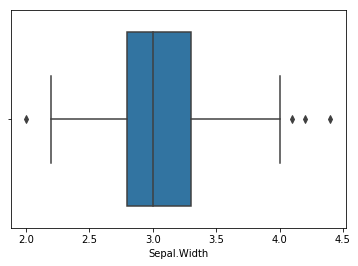

In [7]:
#outlier detected in 'Sepal.Width' column
sb.boxplot(A['Sepal.Width'])

In [8]:
#treatment of outlier
A.shape

(150, 5)

In [9]:
Q1 = A['Sepal.Width'].quantile(0.25)
Q3 = A['Sepal.Width'].quantile(0.75)
IQR = Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

2.8
3.3
0.5
2.05 4.05


In [10]:
A = A[A['Sepal.Width'] < Upper_Whisker ]

In [11]:
A.shape

(147, 5)

In [12]:
#EDA(exploratory data analysis)
CAT = []
CON = []
for i in A.columns:
    if(A[i].dtypes=='object'):
        CAT.append(i)
    else:
        CON.append(i)

In [13]:
CAT

['Species']

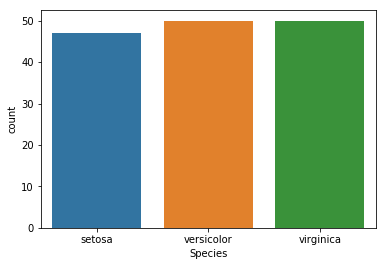

In [14]:
sb.countplot(A['Species'])

In [15]:
A['Species'].value_counts()

versicolor    50
virginica     50
setosa        47
Name: Species, dtype: int64

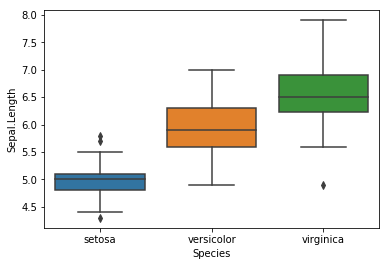

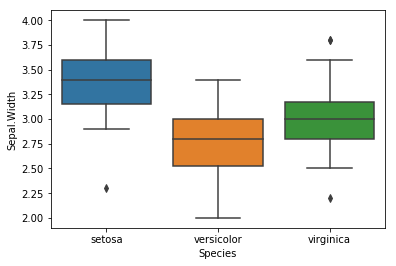

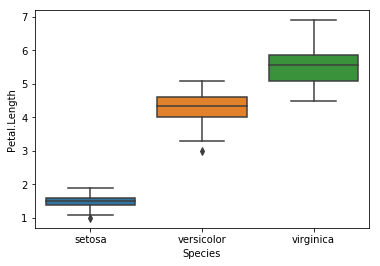

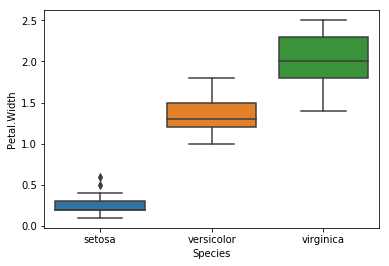

In [16]:
for i in CON:
    sb.boxplot(A['Species'], A[i])
    plt.show()

In [17]:
#machine learning algorithm - multiclass classification
X=A[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]
Y=A[['Species']]

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
A = A.apply(le.fit_transform)

In [19]:
A['Species'].value_counts()

2    50
1    50
0    47
Name: Species, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.20)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain, ytrain)
pred = model.predict(xtest)

from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(ytest, pred))
print(confusion_matrix(ytest, pred))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9333333333333333
[[12  0  0]
 [ 0  6  2]
 [ 0  0 10]]


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [21]:
#serializing the model using pickle file 
import pickle as pkl
pkl.dump(lr, open('model.pkl', 'wb'))

In [22]:
import pandasql as ps

In [26]:
ps.sqldf('select * from A where Species="2"')

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,20,12,36,21,2
1,15,6,27,15,2
2,28,9,35,17,2
3,20,8,32,14,2
4,22,9,34,18,2
5,32,9,40,17,2
6,6,4,21,13,2
7,30,8,38,14,2
8,24,4,34,14,2
9,29,15,37,21,2
